# Fetch MNIST dataset

In [1]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    #mnist_path = os.path.join(".", "datasets", "mnist-original.mat")
    mnist_path = "~/Documents/handsonml/handson-ml/Ch3_Classification_Code_along/datasets/mnist-original.mat"
    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    #if not os.path.exists(mnist_path):
     #   os.makedirs(mnist_path)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

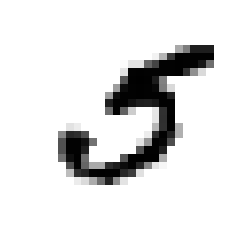

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
        interpolation="nearest")
plt.axis('off')
plt.show()

In [6]:
y[36000]

5.0

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Keeping it simple, we'll first train a binary classifier for the digit 5

In [9]:
y_train_5 = (y_train == 5) #Boolean mapping of 5 or not 5
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy using Cross Validation

In [12]:
from sklearn.model_selection import StratifiedKFold
import copy
#Stratified splitting handles datasets that are skewed in class
#proportionality. It maintians roughly the same ratios of classes
#in each split

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = copy.deepcopy(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.94905
0.93995
0.96145


Not bad, lets test it with cross_val_score() from sklearn

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([0.96995, 0.9279 , 0.94675])

Think it's good? Let's make a classifier that never selects 5

In [14]:
from sklearn.base import BaseEstimator
#When used in inheritance, BaseEstimator gives get_param() and set_param()

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.90835, 0.90935, 0.91125])

### Accuracy is a poor metric of evaluation. Instead, use confusion matrix

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [17]:
y_train_pred.shape

(60000,)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53446,  1133],
       [ 1124,  4297]])

### Precision and Recall

Precision: TP/(TP + FP)
Recall: TP/(TP + FN)

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7913443830570902

In [20]:
recall_score(y_train_5, y_train_pred)

0.7926581811473897

The "F1-Score" is a metric that combines precision and recall, giving lower scores a greater weight. In order for F1 score to be high, both precision and recall needs to be high. A.K.A. "Harmonic Mean", useful for comparing different models.

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7920007372592388

Precision and Recall Trade off

In the case of a binary classifier, increasing threshold (moving towards the right side in Figure 3-3) increases precision but reduces recall.

Decreasing threshold increases recall but reduces precision.

Scikitlearn's predictors don't allow you to change threshold but it can return decision scores. That score can be used to make decision based on any theshold you want.

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([157873.22714641])

In [23]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [24]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
#Using cross val scores again but specifying we want decision scores
#instead of predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
# Always labels first, then prediction scores

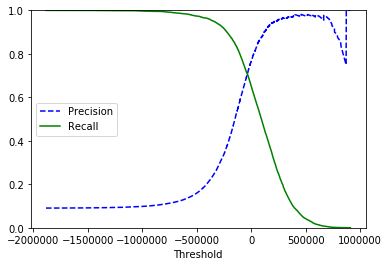

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [28]:
y_train_pred_90 = (y_scores > 70000)

In [29]:
precision_score(y_train_5, y_train_pred_90)

0.8572266197596012

In [30]:
recall_score(y_train_5, y_train_pred_90)

0.5393838775133739

# The ROC Curve

Receiver Operating Characteristic curve

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


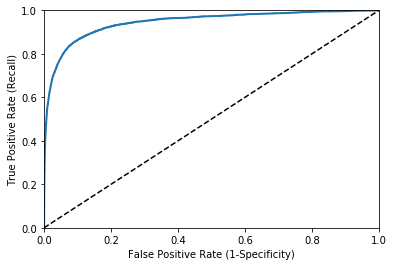

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (1-Specificity)")
    plt.ylabel("True Positive Rate (Recall)")
    
plot_roc_curve(fpr,tpr)

TPR vs FPR tradeoff.

Dotted line is a random classifier, good classifiers produce a ROC that is far away from the dotted line.

Area under the ROC curve measures the quality of a classifier. 1 = Perfect, 0.5 = Random

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9449069625230351

# ROC on a Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                   method="predict_proba")

In [35]:
y_probas_forest
#Unlike decision_function for SGDClassifier, random forest only has 
#"predict_proba" function. This returns a row for each training example,
#And a column for each class containing probability of that class.

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [36]:
#To plot ROC, we'll need scores not probabilities. Just use the 'True'
#values as scores
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                     y_scores_forest)

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/matplotlib/legend.py:493: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	lower right
	best
	lower center
	center right
	center left
	lower left
	upper left
	center
	upper center
	upper right
	right

  % (loc, '\n\t'.join(self.codes)))


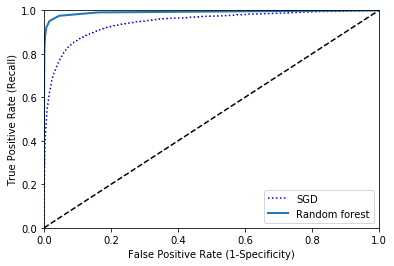

In [37]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc = "lower_right")

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9914543112770987

In [39]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                   method="predict")
precision_score(y_train_5, y_pred_forest)

0.9869900771775083

In [40]:
recall_score(y_train_5, y_pred_forest)

0.8256779192030991

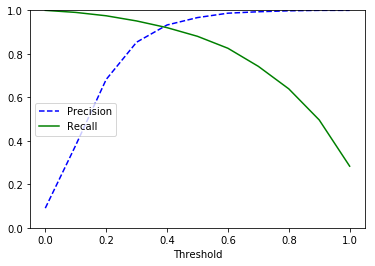

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# MULTICLASS CLASSIFICATION

## (ALL NUMBERS IN MNIST)

In [42]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [43]:
sgd_clf.decision_function([some_digit])

array([[ -64498.28391024, -344850.68526508, -426972.63373688,
        -181690.56075485, -490299.50086537,   88609.41910659,
        -595017.2829832 , -345282.6657681 , -549015.94593325,
        -669703.30866919]])

In [44]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### Explicitly using One vs. One with SGDClassifier

In [45]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([5.])

In [46]:
ovo_clf.decision_function([some_digit])

array([[7.22093208, 3.87361225, 4.04577502, 7.28980991, 1.82848593,
        9.5       , 0.55814507, 3.9491431 , 1.81488959, 4.91920704]])

In [47]:
len(ovo_clf.estimators_)

45

### Using RandomForestClassifier

In [48]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [49]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [50]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([0.8604779 , 0.86054303, 0.86582987])

### Try scaling input

In [51]:
from sklearn.preprocessing import StandardScaler

"""
Remember standardization subtracts mean and divides by variance.
This is more robust against outliers than normalization where
the values are squeezed between 0 and 1.
"""

#A transformer
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,
                scoring='accuracy')

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([0.90676865, 0.9099455 , 0.91128669])

# Error Analysis

In [52]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edwardchaos/.local/share/virtualenvs/TF_py3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([[5726,    2,   21,    7,   10,   53,   48,    9,   43,    4],
       [   1, 6484,   49,   27,    6,   41,    6,   11,  105,   12],
       [  55,   41, 5313,  111,   78,   26,   99,   61,  159,   15],
       [  45,   41,  134, 5325,    1,  244,   33,   59,  138,  111],
       [  17,   30,   40,    9, 5329,   10,   63,   33,   86,  225],
       [  72,   36,   31,  187,   69, 4615,  111,   33,  169,   98],
       [  38,   25,   44,    2,   35,   88, 5631,    6,   49,    0],
       [  22,   24,   71,   22,   43,   11,    5, 5798,   14,  255],
       [  56,  155,   62,  153,   11,  157,   62,   27, 5019,  149],
       [  41,   33,   27,   88,  136,   37,    3,  210,   73, 5301]])

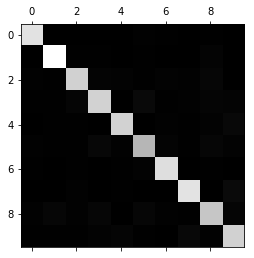

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

Looks pretty good, lets look at only the errors. We'll need to scale the errors in each row by the number of examples for each number otherwise abundant digits would appear to perform worse.

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [55]:
norm_conf_mx = conf_mx / row_sums

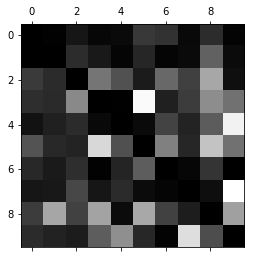

In [56]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [57]:
"""
cl_a, cl_b = 3,5

X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)] #Correctly classified 3's
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)] #3's classified as 5's
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)] #5's classified as 3's
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)] #5's classified as 5's

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_aa[:25], images_per_row=5)
plt.show()
"""

#Just plots the 3's and 5's that were confused and not confused

"\ncl_a, cl_b = 3,5\n\nX_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)] #Correctly classified 3's\nX_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)] #3's classified as 5's\nX_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)] #5's classified as 3's\nX_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)] #5's classified as 5's\n\nplt.figure(figsize=(8,8))\nplt.subplot(221); plt.imshow(X_aa[:25], images_per_row=5)\nplt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)\nplt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)\nplt.subplot(224); plot_digits(X_aa[:25], images_per_row=5)\nplt.show()\n"

# Multilabel Classification

In [58]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

#y_multilabel is a label that specifies whether the number is >= 7 and
#whether the number is odd

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Multioutput Classification

An extension of multilabel where each label can have more than 2 values. This example is of removing noise from noisy mnist images

In [61]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

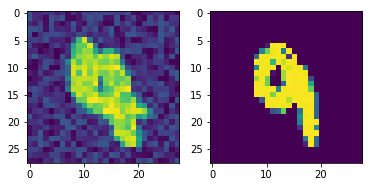

In [68]:
clean_digit = knn_clf.predict([X_test_mod[5000]])
plt.subplot(121); plt.imshow(X_test_mod[5000].reshape(28,28))
plt.subplot(122); plt.imshow(clean_digit.reshape(28,28))